# Machine Learning Foundation

## Section 1, Part c: EDA Lab


## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `iris_data.csv` found in the [data](data/) directory.


In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [172]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

*   The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
*   The column names. (*Hint:* check out the dataframe `.columns` attribute.)
*   The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)


In [13]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/iris_data.csv")
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [14]:
data_1 = data

In [4]:
### BEGIN SOLUTION
# Number of rows
print(data.shape[0])

# Column names
print(data.columns.tolist())

# Data types
print(data.dtypes)
### END SOLUTION

150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter.

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).


In [7]:
set(data['species'])

{'setosa', 'versicolor', 'virginica'}

In [8]:
### BEGIN SOLUTION
# The str method maps the following function to each entry as a string
data['species'] = data.species.str.replace('Iris-', '')
# alternatively
# data['species'] = data.species.apply(lambda r: r.replace('Iris-', ''))

data.head()
### END SOLUTION

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
data = pd.DataFrame({'a': ['a','b','c','d','e','f','g','h','i','j']})
data['a'] = np.array([1,2,3,4,5,6,7,8,9,10])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       10 non-null     int32
dtypes: int32(1)
memory usage: 168.0 bytes


## Question 3

Determine the following:

*   The number of each species present. (*Hint:* check out the series `.value_counts` method.)
*   The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.


In [9]:
data['species'].value_counts() # number of each species present in the dataset
#@data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
### BEGIN SOLUTION
# One way to count each species
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [11]:
# Select just the rows desired from the 'describe' method and add in the 'median'
stats_df = data.describe()
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df
### END SOLUTION

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


## Question 4

Calculate the following **for each species** in a separate dataframe:

*   The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
*   The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01#applying-multiple-functions-at-once) for a hint.


In [16]:
### BEGIN SOLUTION
# The mean calculation
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [17]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [18]:
# applying multiple functions at once - 2 methods

data.groupby('species').agg(['mean', 'median'])  # passing a list of recognized strings
data.groupby('species').agg([np.mean, np.median])  # passing a list of explicit aggregation functions

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [19]:
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)
### END SOLUTION

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.


In [20]:
### BEGIN SOLUTION
import matplotlib.pyplot as plt
%matplotlib inline

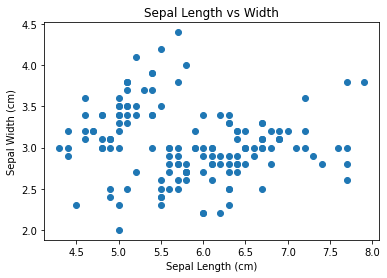

In [21]:
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');
### END SOLUTION

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate.


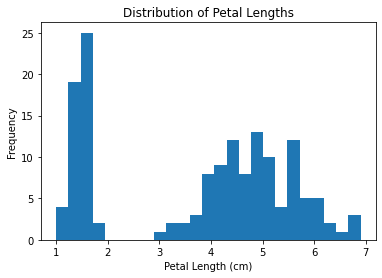

In [22]:
### BEGIN SOLUTION
# Using Matplotlib's plotting functionality
ax = plt.axes()
ax.hist(data.petal_length, bins=25);

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');

In [ ]:
# Alternatively using Pandas plotting functionality
ax = data.petal_length.plot.hist(bins=25)

ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths');
### END SOLUTION

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for Pandas.


In [ ]:
import seaborn as sns
sns.set_context('notebook')
### BEGIN SOLUTION
# This uses the `.plot.hist` method
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');

In [ ]:
# To create four separate plots, use Pandas `.hist` method
axList = data.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')
### END SOLUTION

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01#visualization-box).


In [ ]:
### BEGIN SOLUTION
# Here we have four separate plots
data.boxplot(by='species');
### END SOLUTION

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues.

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0 | setosa  | sepal_length | 5.1  |
| 1 | setosa  | sepal_width  | 3.5  |


In [ ]:
### BEGIN SOLUTION
# First we have to reshape the data so there is 
# only a single measurement in each column

plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()
### END SOLUTION

In [ ]:
### BEGIN SOLUTION
# Now plot the dataframe from above using Seaborn

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);
### END SOLUTION

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.


In [ ]:
### BEGIN SOLUTION
sns.set_context('talk')
sns.pairplot(data, hue='species');
### END SOLUTION

<H1> WASHINGTON UNIVERSITY PRACTICE DATA </H1>

In [119]:
# all imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------- all important functions ---------------------------------

def percent_number(data, percent):
    return round(percent/100*data)



4

In [19]:
# importing data
data_housing = pd.read_csv('usa_data/kc_house_data.csv')
data_housing.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [20]:
data_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [125]:
# dividing the data in 80-20
# 80 for training and 20 for testing
data_housing.shape
percent_number(21613,80)

17290

In [137]:
# TRAINING DATASE
data_housing['random_number'] 
list_1 = []

for i in range(0, 21613):
    list_1.append(np.random.random())



In [138]:
data_housing['random_number']  = list_1

In [160]:
data_train = data_housing[data_housing['random_number']> .5]
data_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,random_number
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0.977096
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0.516500
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,0.583628
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,0.963138
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,0.564244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,0.701997
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,1180,130,2008,0,98116,47.5773,-122.409,1330,1265,0.688798
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,0.610011
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,0.748669


Text(0.5, 0, 'price')

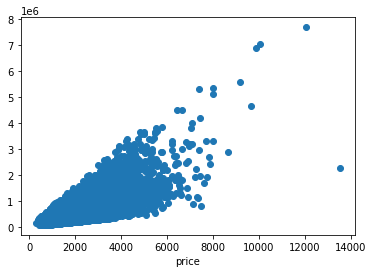

In [166]:
# plotting data to get early visulization

#plt.scatter(data_housing['price'], data_housing['sqft_living'])
# using subplots_adjust
fig, axes = plt.subplots()
axes.scatter(data_housing['sqft_living'], data_housing['price'])
axes.set_xlabel("price")


In [167]:
# applying linear regression model
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(data_train[['sqft_living']])
train_y = np.asanyarray(data_train[['price']])
regr.fit(train_x, train_y)
# The coefficients  regression
# possible data came out 
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)  # y = 

Coefficients:  [[281.0579948]]
Intercept:  [-44356.87487891]


In [170]:
# testing data
regr.predict([[770]])

array([[172057.781114]])

In [164]:
data_housing[data_housing['random_number']<.5]['sqdt_living']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,random_number
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0.320303
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0.285538
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0.207741
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,0.067337
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,0.040291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21600,249000205,20141015T000000,1537000.0,5,3.75,4470,8088,2.0,0,0,...,4470,0,2008,0,98004,47.6321,-122.200,2780,8964,0.082145
21601,5100403806,20150407T000000,467000.0,3,2.50,1425,1179,3.0,0,0,...,1425,0,2008,0,98125,47.6963,-122.318,1285,1253,0.156754
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,2270,0,2003,0,98065,47.5389,-121.881,2270,5731,0.370043
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,0.390510


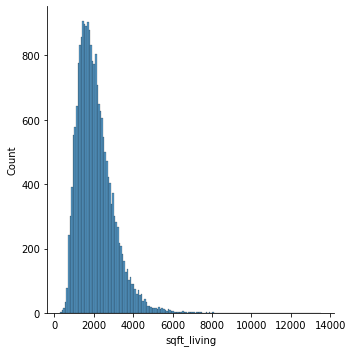

In [173]:
# checking for normality
sns.displot(data_housing['sqft_living'])


In [157]:
data_train['price']

10754

array([3, 3, 2, ..., 2, 3, 2], dtype=int64)

In [113]:
# revision of random number generator
#np.random.seed(10)
walk = [0]
for i in range(0,501):
    
    if(np.random.randint(0,2) == 1):
        
        walk.append(walk[-1]+1)
        
    else:
        walk.append(walk[-1]-1)
        

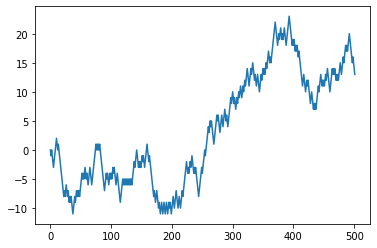

In [115]:
np.random.seed(1234)
np.random.randint(0,2)
plt.plot(walk)

In [178]:
x = np.array([[ 0, 1, 2],[ 3, 4, 5],[ 6, 7, 8],[ 9, 10, 11]])
x[[0,1],[0,1]]

array([0, 4])

In [9]:
x  = [5,4,3,2,1]
x.sort(reverse = False)
x

[1, 2, 3, 4, 5]

In [13]:
import numpy as np
x = [1, 3, 4, 1, 0, 2, 5, 8, 0, 
2, 3, 4, 7, 11, 0, 2, 3, 3].sort(reverse = False)

In [10]:
import numpy as np
print(np.array([1, 3, 4, 1, 0, 2, 5, 8, 0, 2, 3, 4, 7, 11, 0, 2, 3, 4]).sort(,))

None
